In [2]:
import pandas as pd
import sys
!{sys.executable} -m pip install pandas_datareader
import numpy as np
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

# Importing stock data
Nflix is Netflix, NKE is nike, FB is facebook, AAPL is Apple, WMT is walmart

In [37]:
start = datetime(2016, 1, 1)
symbols_list = ['Nflx','NKE', 'FB', 'AAPL', 'WMT']


# Correlation matrix

In [38]:
# Let's set up an empty array to store the prices that we are pulling from Yahooo Finance

symbols=[]

for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)

# add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)
    
# Let's load them into the dataframe

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Adj Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Adj Close').reset_index()
df_pivot.tail()

Symbol,Date,AAPL,FB,NKE,Nflx,WMT
1117,2020-06-11,335.899994,224.429993,95.169998,425.559998,120.089996
1118,2020-06-12,338.799988,228.580002,96.430000,418.070007,117.739998
1119,2020-06-15,342.989990,232.500000,97.839996,425.500000,118.080002
1120,2020-06-16,352.079987,235.649994,99.040001,436.130005,119.650002
1121,2020-06-17,351.589996,235.529999,99.209999,447.769989,119.029999


In [39]:
# Let's run the correlation between these stocks

corr_df = df_pivot.corr(method='pearson')


#Swapping Symbols as Index

corr_df.head().reset_index()
del corr_df.index.name
corr_df.head()

Symbol,AAPL,FB,NKE,Nflx,WMT
AAPL,1.000000,0.851963,0.883968,0.833280,0.914912
FB,0.851963,1.000000,0.745988,0.808746,0.813561
NKE,0.883968,0.745988,1.000000,0.852196,0.899788
Nflx,0.833280,0.808746,0.852196,1.000000,0.828933
WMT,0.914912,0.813561,0.899788,0.828933,1.000000


# Explanation:

"Stock Correlation is the statistical measure of the relationship between two stocks. The correlation coefficient ranges between -1 and +1. A correlation of +1 implies that the two stocks will move in the same direction 100% of the time. A correlation of -1 implies the two stocks will move in the opposite direction 100% of the time. A correlation of zero implies that the relationship between the stocks is completely random. Correlations do not always remain stable and can even change on a daily basis. Correlation analysis can help you to diversify your positions. Imperfect correlation between two different stocks allows for more diversification and marginally lower risk."

In our data we can see that the stocks are perfectly corelated with each other as the value is not zero and positively corelated with other stocks as the vlaue is not in negative. It also states that its a good decision to invest on these stocks as the risk is low and the corelation is not random or negative.

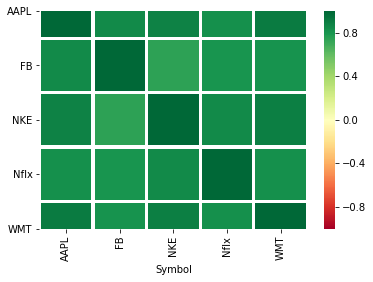

In [40]:
# Now Let's put the dataframe into a visual chart


canvas = np.zeros_like(corr_df)
canvas[np.triu_indices_from(canvas)] = True

#Visualization Code

seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , linewidths=2.1)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

# Random Walk Theory & Monte Carlo SImulation

In [41]:

#Simulation 1

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

In [48]:
#downloading AMAZON price data into DataFrame
AMZN = data.DataReader('AMZN', 'yahoo',start='1/1/2016')

#calculating the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (AMZN.index[-1] - AMZN.index[0]).days
cagr = ((((AMZN['Adj Close'][-1]) / AMZN['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#creating a series of percentage returns and calculate 
#the annual volatility of returns

AMZN['Returns'] = AMZN['Adj Close'].pct_change()
vol = AMZN['Returns'].std()*math.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 37.76%
Annual Volatility = 29.54%


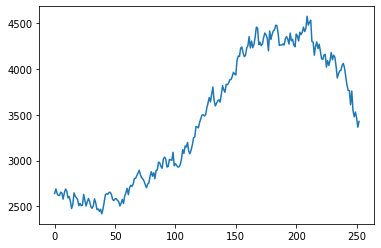

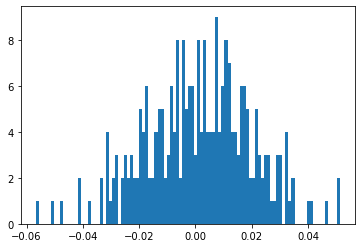

In [49]:
#Define Variables
S = AMZN['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.378 #Return
vol = 0.295#Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

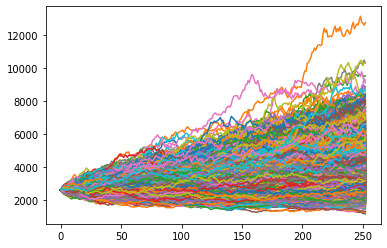

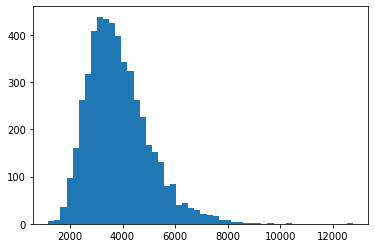

In [50]:
#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = AMZN['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.378 #Return
vol = 0.295#Volatility

#choose number of runs to simulate - I have chosen 10,000
for i in range(5000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

#show the plot of multiple price series created above
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [51]:
print("The average price of Amazon stock can be",round(np.mean(result),2), "in one year.")

The average price of Amazon stock can be 3846.85 in one year.


In [52]:
#Random Walk Theory & Monte Carlo SImulation
#Simulation 2

#downloading AMAZON price data into DataFrame
AMZN = data.DataReader('AMZN', 'yahoo',start='1/1/2016')

#calculating the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (AMZN.index[-1] - AMZN.index[0]).days
cagr = ((((AMZN['Adj Close'][-1]) / AMZN['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#creating a series of percentage returns and calculate 
#the annual volatility of returns

AMZN['Returns'] = AMZN['Adj Close'].pct_change()
vol = AMZN['Returns'].std()*math.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")



CAGR = 37.76%
Annual Volatility = 29.54%


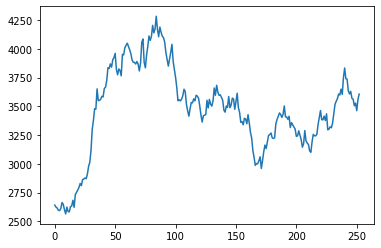

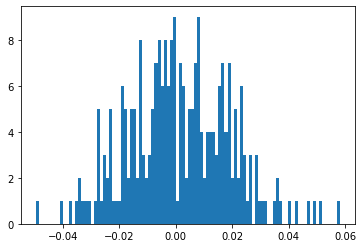

In [53]:
#Define Variables
S = AMZN['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.378 #Return
vol = 0.295#Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

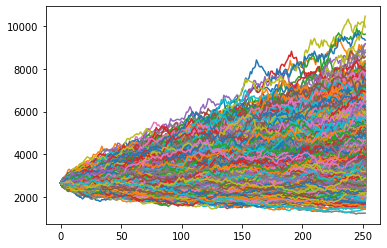

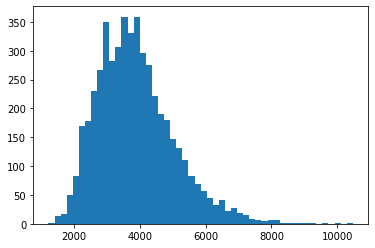

In [54]:
#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = AMZN['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.378 #Return
vol = 0.295#Volatility

#choose number of runs to simulate - I have chosen 10,000
for i in range(5000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

#show the plot of multiple price series created above
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [55]:
print("The average price of Amazon stock can be",round(np.mean(result),2), "in one year.")

The average price of Amazon stock can be 3875.74 in one year.


In [56]:
#Random Walk Theory & Monte Carlo SImulation
#Simulation 3

#downloading AMAZON price data into DataFrame
AMZN = data.DataReader('AMZN', 'yahoo',start='1/1/2016')

#calculating the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (AMZN.index[-1] - AMZN.index[0]).days
cagr = ((((AMZN['Adj Close'][-1]) / AMZN['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#creating a series of percentage returns and calculate 
#the annual volatility of returns

AMZN['Returns'] = AMZN['Adj Close'].pct_change()
vol = AMZN['Returns'].std()*math.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 37.76%
Annual Volatility = 29.54%


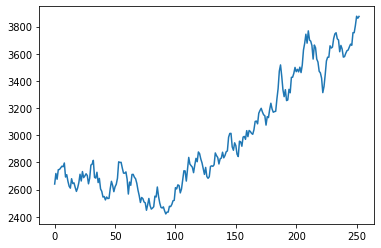

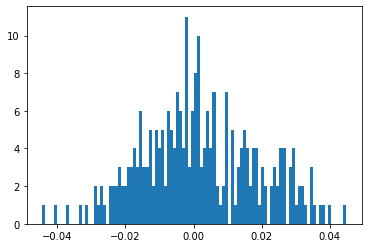

In [57]:
#Define Variables
S = AMZN['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.378 #Return
vol = 0.295#Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

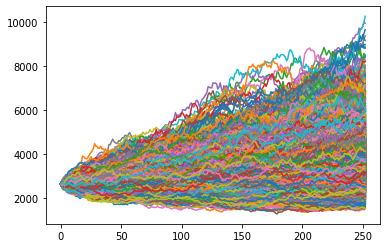

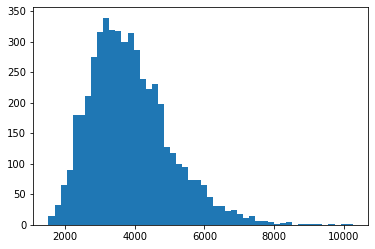

In [58]:
#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = AMZN['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.378 #Return
vol = 0.295#Volatility

#choose number of runs to simulate - I have chosen 10,000
for i in range(5000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

#show the plot of multiple price series created above
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [59]:
print("The average price of Amazon stock can be",round(np.mean(result),2), "in one year.")

The average price of Amazon stock can be 3868.93 in one year.
